### Homework 2: More Exploratory Data Analysis
## Gene Expression Data and Election Polls 

Due: Thursday, September 29, 2016 11:59 PM


#### Submission Instructions
To submit your homework, create a folder named **lastname_firstinitial_hw#** and place your IPython notebooks, data files, and any other files in this folder. Your IPython Notebooks should be completely executed with the results visible in the notebook. We should not have to run any code. Make sure to share the private repo with my github account (mdog) and submit the repo path through blackboard.

---

## Introduction

John Tukey wrote in [Exploratory Data Analysis, 1977](http://www.amazon.com/Exploratory-Data-Analysis-Wilder-Tukey/dp/0201076160/ref=pd_bbs_sr_2/103-4466654-5303007?ie=UTF8&s=books&qid=1189739816&sr=8-2): "The greatest value of a picture is when it forces us to notice what we never expected to see." In this assignment we will continue using our exploratory data analysis tools, but apply it to new sets of data: [gene expression](http://en.wikipedia.org/wiki/Gene_expression) and polls from the [2012 Presidental Election](http://en.wikipedia.org/wiki/United_States_presidential_election,_2012) and from the [2014 Senate Midterm Elections](http://en.wikipedia.org/wiki/United_States_Senate_elections,_2014).   

**First**: You will use exploratory data analysis and apply the [singular value decomposition](http://en.wikipedia.org/wiki/Singular_value_decomposition) (SVD) to a gene expression data matrix to determine if the the date that the gene expression samples are processed has large effect on the variability seen in the data.  

**Second**: You will use the polls from the 2012 Presidential Elections to determine (1) Is there a pollster bias in presidential election polls? and (2) Is the average of polls better than just one poll?

**Finally**: You will use the [HuffPost Pollster API](http://elections.huffingtonpost.com/pollster/api) to extract the polls for the current 2014 Senate Midterm Elections and provide a preliminary prediction of the result of each state.

#### Data

We will use the following data sets: 

1. A gene expression data set called `exprs_GSE5859.csv` and sample annotation table called `sampleinfo_GSE5859.csv` which are both available on Github in the 2014_data repository: [expression data set](https://github.com/cs109/2014_data/blob/master/exprs_GSE5859.csv) and [sample annotation table](https://github.com/cs109/2014_data/blob/master/sampleinfo_GSE5859.csv).  

2. Polls from the [2012 Presidential Election: Barack Obama vs Mitt Romney](http://elections.huffingtonpost.com/pollster/2012-general-election-romney-vs-obama). The polls we will use are from the [Huffington Post Pollster](http://elections.huffingtonpost.com/pollster).  

3. Polls from the [2014 Senate Midterm Elections](http://elections.huffingtonpost.com/pollster) from the [HuffPost Pollster API](http://elections.huffingtonpost.com/pollster/api). 

---

## Load Python modules

In [23]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 

import requests 
from io import StringIO
import numpy as np
import pandas as pd # pandas
import matplotlib.pyplot as plt # module for plotting 
import datetime as dt # module for manipulating dates and times
import numpy.linalg as lin # module for performing linear algebra operations

## Problem 2: Is there a pollster bias in presidential election polls?

#### Problem 2(a)

The [HuffPost Pollster](http://elections.huffingtonpost.com/pollster) contains many political polls. You can access these polls from individual races as a CSV but you can also access polls through the [HuffPost Pollster API](http://elections.huffingtonpost.com/pollster/api) to access the data.  

Read in the polls from the [2012 Presidential Election: Barack Obama vs Mitt Romney](http://elections.huffingtonpost.com/pollster/2012-general-election-romney-vs-obama) into a pandas DataFrame called `election`. For this problem, you may read in the polls for this race directly using [the CSV file](http://elections.huffingtonpost.com/pollster/2012-general-election-romney-vs-obama.csv) available from the HuffPost Pollster page.

In [24]:
url = "http://elections.huffingtonpost.com/pollster/2012-general-election-romney-vs-obama.csv"
source = requests.get(url).text
s = StringIO(source)
election = pd.DataFrame.from_csv(s, index_col=None).convert_objects(
            convert_dates="coerce", convert_numeric=True) # Access polls as a CSV file

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


Show the head of the `election` DataFrame. 

In [25]:
#your code here
election.head(10)

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06 08:40:26,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26 15:31:23,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06 09:22:02,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06 08:51:48,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,http://elections.huffingtonpost.com/pollster/p...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06 08:47:50,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1
5,JZ Analytics/Newsmax,2012-11-03,2012-11-05,2012-11-06 07:38:41,1041.0,Likely Voters,Internet,47.0,47.0,6.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.jzanalytics.com/,Sponsor,Rep,NaN,1
6,UPI/CVOTER,2012-11-03,2012-11-05,2012-11-05 18:30:15,3000.0,Likely Voters,Live Phone,49.0,48.0,NaN,NaN,http://elections.huffingtonpost.com/pollster/p...,NaN,Nonpartisan,None,NaN,1
7,Ipsos/Reuters (Web),2012-11-01,2012-11-05,2012-11-05 16:12:48,4725.0,Likely Voters,Internet,48.0,46.0,4.0,2.0,http://elections.huffingtonpost.com/pollster/p...,http://big.assets.huffingtonpost.com/ipsos1105...,Nonpartisan,None,NaN,1
8,ARG,2012-11-02,2012-11-04,2012-11-05 13:06:54,1200.0,Likely Voters,Live Phone,49.0,49.0,1.0,1.0,http://elections.huffingtonpost.com/pollster/p...,http://americanresearchgroup.com/pres2012/NA12...,Nonpartisan,None,NaN,1
9,PPP (D-Americans United for Change),2012-11-02,2012-11-04,2012-11-04 22:32:19,1200.0,Likely Voters,Automated Phone,50.0,48.0,3.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.publicpolicypolling.com/pdf/2011/PP...,Sponsor,Dem,NaN,1


How many polls were conducted in November? Define this number as M.  

**Hint**: Subset the `election` DataFrame for only dates in the `Start Date` column that are in November 2012.  

In [49]:
import warnings
warnings.filterwarnings('ignore')

eNov = election[( ((election['End Date'] >= '2012-11-10') & (election['End Date'] <= '2012-11-30')) | (election['Start Date'] >= '2012-11-01') & (election['Start Date'] <= '2012-11-20'))]
eNov.drop_duplicates('Pollster',inplace = True)
print(len(eNov))

18


Answer: 18 polls

What was the median of the number of observations in the November polls? Define this quantity as N. 

In [50]:
#your code here
N = np.median(eNov["Number of Observations"])
print(N)

1200.0


Answer: 1200

#### Problem 2(b)

Using the median sample size $N$ from Problem 1(a), simulate the results from a single poll:  simulate the number of votes for Obama out of a sample size $N$ where $p$ = 0.53 is the percent of voters who are voting for Obama.  

**Hint**: Use the binomial distribution with parameters $N$ and $p$ = 0.53. 

In [51]:
#your code here
single_vote = np.random.binomial(N, 0.53) 
p = single_vote/N
print(str(single_vote))
print(str(p))

641
0.534166666667


Now, perform a Monte Carlo simulation to obtain the estimated percentage of Obama votes with a sample size $N$ where $N$ is the median sample size calculated in Problem 2(a). Let $p$=0.53 be the percent of voters are voting for Obama. 

**Hint**: You will repeat the simulation above 1,000 times and plot the distribution of the estimated *percent* of Obama votes from a single poll.  The results from the single poll you simulate is random variable and will be different every time you sample. 

In [52]:
#your code here
obama = np.random.binomial(N, 0.53, 1000) / N

Plot the distribution of the estimated percentage of Obama votes from your single poll. What is the distribution of the estimated percentage of Obama votes? 

(array([   1.,    0.,    0.,    3.,    5.,    8.,   12.,   25.,   32.,
          55.,   88.,   84.,  127.,  116.,  121.,   87.,   87.,   64.,
          29.,   28.,   14.,    6.,    5.,    2.,    1.]),
 array([ 0.4725    ,  0.47673333,  0.48096667,  0.4852    ,  0.48943333,
         0.49366667,  0.4979    ,  0.50213333,  0.50636667,  0.5106    ,
         0.51483333,  0.51906667,  0.5233    ,  0.52753333,  0.53176667,
         0.536     ,  0.54023333,  0.54446667,  0.5487    ,  0.55293333,
         0.55716667,  0.5614    ,  0.56563333,  0.56986667,  0.5741    ,
         0.57833333]),
 <a list of 25 Patch objects>)

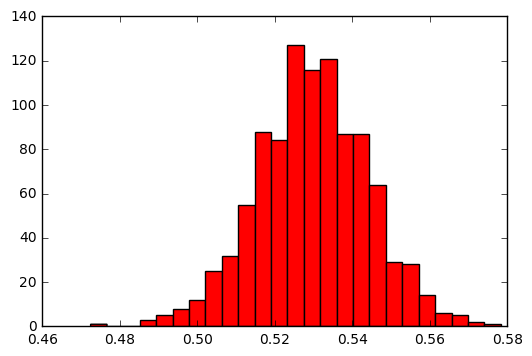

In [53]:
#your code here
#obama = map(lambda x: np.mean(np.random.binomial(1, 0.53, size = N)), range(1000))
obama = [np.mean( np.random.binomial(1, 0.53, size=N) ) for i in range(1000)]

#your code here
plt.hist(obama, color='r',bins=25)

Answer: 

What is the standard error (SE) of the estimated percentage from the poll. 

**Hint**: Remember the SE is the standard deviation (SD) of the distribution of a random variable. 

In [54]:
#your code here
np.std(obama)

0.01445514671896023

#### Problem 2(c)

Now suppose we run M polls where M is the number of polls that happened in November (calculated in Problem 2(a)). Run 1,000 simulations and compute the mean of the M polls for each simulation. 

In [55]:
#your code here
p=0.53
M=eNov
c = str(len(M))
print("Polls "+ c)
print("Number Of Observations: " + str(N))


Polls 18
Number Of Observations: 1200.0


In [56]:
def vote(p, N, M):
    #av = map(lambda x: np.mean(np.random.binomial(1, p, size = N)), range(18))
    av = [np.mean( np.random.binomial(1, p, size=N) ) for i in range(1000)]
    return av
vote(p, N, M) 

[0.52249999999999996,
 0.52833333333333332,
 0.55500000000000005,
 0.50916666666666666,
 0.52749999999999997,
 0.54500000000000004,
 0.52166666666666661,
 0.53333333333333333,
 0.53583333333333338,
 0.51833333333333331,
 0.50749999999999995,
 0.54416666666666669,
 0.53249999999999997,
 0.54749999999999999,
 0.54166666666666663,
 0.53000000000000003,
 0.54416666666666669,
 0.52833333333333332,
 0.50249999999999995,
 0.51749999999999996,
 0.53000000000000003,
 0.53249999999999997,
 0.52416666666666667,
 0.53166666666666662,
 0.53833333333333333,
 0.54416666666666669,
 0.50249999999999995,
 0.53666666666666663,
 0.53166666666666662,
 0.53833333333333333,
 0.54166666666666663,
 0.50583333333333336,
 0.54833333333333334,
 0.5541666666666667,
 0.50416666666666665,
 0.48916666666666669,
 0.5575,
 0.53833333333333333,
 0.51166666666666671,
 0.52416666666666667,
 0.51333333333333331,
 0.54333333333333333,
 0.49833333333333335,
 0.52000000000000002,
 0.52666666666666662,
 0.55333333333333334,
 0

What is the distribution of the average of polls?

**Hint**: Show a plot. 

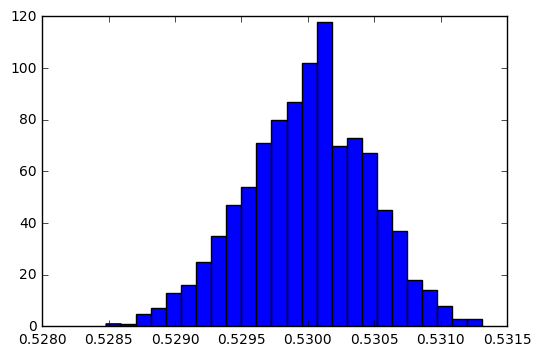

In [57]:
#your code here
ave = [np.mean(vote(p, N, M)) for x in range(1000)]
plt.hist(ave, bins=25)
plt.show()

Answer: 

What is the standard error (SE) of the average of polls? 

In [58]:
#your code here
np.std(ave) 

0.00046491776515897369

Answer: 0.0034734234338877025

Is the SE of the average of polls larger, the same, or smaller than that the SD of a single poll (calculated in Problem 2(b))? By how much?

**Hint**: Compute a ratio of the two quantities.  

In [59]:
#your code here
ratio = np.std(ave) / np.std(obama) 
ratio

0.032162784245500592

Answer: 0.23627078357470085. SE is smaller than SD with given ratio on the top

#### Problem 2(d) 

Repeat Problem 2(c) but now record the *across poll* standard deviation in each simulation. 

In [60]:
#your code here
B = 1000
p = 0.53
sd = [np.std(vote(p, N, M), ddof = 0)for i in range(B)]

What is the distribution of the *across M polls* standard deviation?

**Hint**: Show a plot. 

(array([   5.,   33.,   59.,  140.,  231.,  231.,  171.,   78.,   42.,   10.]),
 array([ 0.01337268,  0.0135701 ,  0.01376753,  0.01396495,  0.01416237,
         0.0143598 ,  0.01455722,  0.01475464,  0.01495207,  0.01514949,
         0.01534691]),
 <a list of 10 Patch objects>)

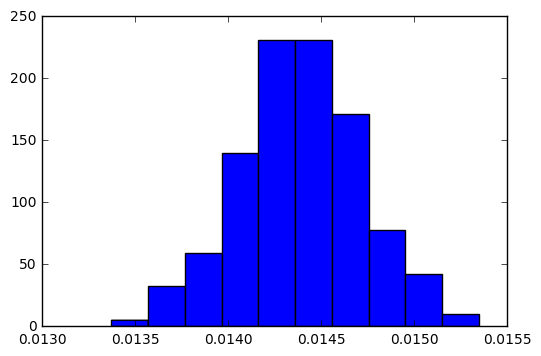

In [61]:
#your code here
plt.hist(sd)

Answer: 

#### Problem 2(e) 

What is the standard deviation of M polls in our real (not simulated) 2012 presidential election data ? 

In [62]:
#your code here
c=np.std(eNov['Obama'].values/100.0)
c

0.010829771494232192

Is this larger, the same, or smaller than what we expeced if polls were not biased.

In [63]:
#your code here
c / np.mean(sd)

0.75265753632151522

Answer: is smaller than we expected 

#### Problem 2(f)

Learn about the normal approximation for the binomial distribution and derive the results of Problem 2(b) and 2(c) analytically (using this approximation). Compare the results obtained analytically to those obtained from simulations.

In [65]:
#your code here
print("SD simulation:" + str(np.std(obama)))
print("SD Analytically:" + str(np.sqrt(p * (1-p)/ N)))


SD simulation:0.014455146719
SD Analytically:0.0144077525428


In [66]:
 
print("SD simulation: "+str(np.std(ave)))
print("SD Analytically: "+str(np.sqrt((0.53 * (1-0.53)/ 1200) / 18)))


SD simulation: 0.000464917765159
SD Analytically: 0.00339593984155


Answer: Using normal approximation matched the analytics

## Discussion for Problem 2

*Write a brief discussion of your conclusions to the questions and tasks above in 100 words or less.*

the presidential standard deviation for 2012 was smaller than we expected


# Submission Instructions

To submit your homework, create a folder named **lastname_firstinitial_hw#** and place your IPython notebooks, data files, and any other files in this folder. Your IPython Notebooks should be completely executed with the results visible in the notebook. We should not have to run any code. Make sure to share the private repo with my github account (mdog) and submit the repo path through blackboard.
